In [48]:

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

data = pd.read_csv('C:/Users/HOANG NAM/Desktop/cau1.csv')
data.head(20)

,Loại,Số màu,Kích thước,Chất liệu,Doanh số bán
0,Điều khiển,3,Nhỏ,Nhựa PP,Cao
1,Xếp hình,5,Vừa,Cao su,Thấp
2,Xếp hình,7,To,Nhựa PP,Thấp
3,Điều khiển,5,Nhỏ,Cao su,Thấp
4,Búp bê,3,Vừa,Nhựa PP,Thấp
5,Điều khiển,5,Vừa,Nhựa PP,Cao
6,Búp bê,5,To,Nhựa PP,Cao
7,Điều khiển,7,Vừa,Cao su,Thấp
8,Xếp hình,7,To,Cao su,Cao
9,Xếp hình,3,To,Nhựa PP,Thấp


In [49]:
#Tách 3 dòng dữ liệu cuối dùng để dự đoán 
pre_data=data[15:18]
pre_data = pre_data.drop(['Doanh số bán'],axis=1)
data = data[0:15]
print(pre_data)

          Loại  Số màu Kích thước Chất liệu
15      Búp bê       3         To    Cao su
16    Xếp hình       5         To   Nhựa PP
17  Điều khiển       3        Vừa    Cao su


In [50]:
data['Doanh số bán'] = [0 if i == "Thấp" else 1 for i in data['Doanh số bán']]
data.head(20)

,Loại,Số màu,Kích thước,Chất liệu,Doanh số bán
0,Điều khiển,3,Nhỏ,Nhựa PP,1
1,Xếp hình,5,Vừa,Cao su,0
2,Xếp hình,7,To,Nhựa PP,0
3,Điều khiển,5,Nhỏ,Cao su,0
4,Búp bê,3,Vừa,Nhựa PP,0
5,Điều khiển,5,Vừa,Nhựa PP,1
6,Búp bê,5,To,Nhựa PP,1
7,Điều khiển,7,Vừa,Cao su,0
8,Xếp hình,7,To,Cao su,1
9,Xếp hình,3,To,Nhựa PP,0


<AxesSubplot:>

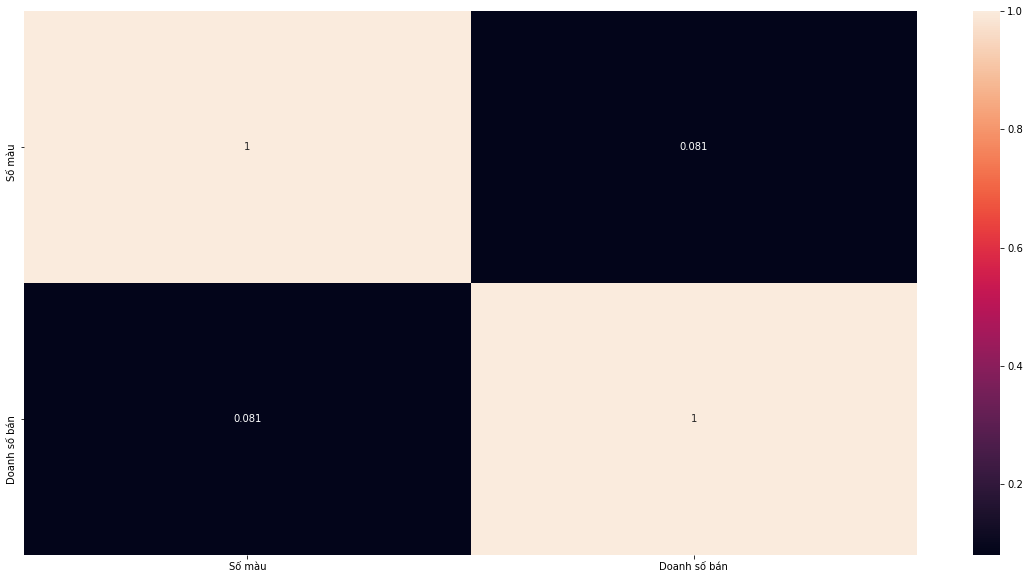

In [51]:
#Khảo sát độ tương đồng giữa các cột với nhau
plt.figure (figsize=(20,10))
sns.heatmap(data.corr( method='pearson' ),annot=True)


In [52]:
#Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
#phần chứa riêng thuộc tính quyết định.
features = data.drop( 'Doanh số bán' , axis=1)
labels = data[ 'Doanh số bán' ]


In [53]:
features.select_dtypes(exclude=['int64']).columns

Index(['Loại', 'Kích thước', 'Chất liệu'], dtype='object')

In [54]:
#Chuyển đổi các cột không phải dạng số về dạng one-hot vector
features_onehot=pd.get_dummies ( features , columns =features.select_dtypes(exclude=['int64']).columns)
features_onehot


,Số màu,Loại_Búp bê,Loại_Xếp hình,Loại_Điều khiển,Kích thước_Nhỏ,Kích thước_To,Kích thước_Vừa,Chất liệu_Cao su,Chất liệu_Nhựa PP
0,3,0,0,1,1,0,0,0,1
1,5,0,1,0,0,0,1,1,0
2,7,0,1,0,0,1,0,0,1
3,5,0,0,1,1,0,0,1,0
4,3,1,0,0,0,0,1,0,1
5,5,0,0,1,0,0,1,0,1
6,5,1,0,0,0,1,0,0,1
7,7,0,0,1,0,0,1,1,0
8,7,0,1,0,0,1,0,1,0
9,3,0,1,0,0,1,0,0,1


In [58]:
#Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.
X_train = features_onehot[: 13] 
X_test = features_onehot[13:] 
y_train = labels[ :13]
y_test = labels[13:]

In [59]:
#Xây dựng cây ID3
clf=tree.DecisionTreeClassifier(criterion="entropy", random_state=0) 
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [60]:
#áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test, tree_pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))


Accuracy: 0.5
Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



In [61]:
#ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

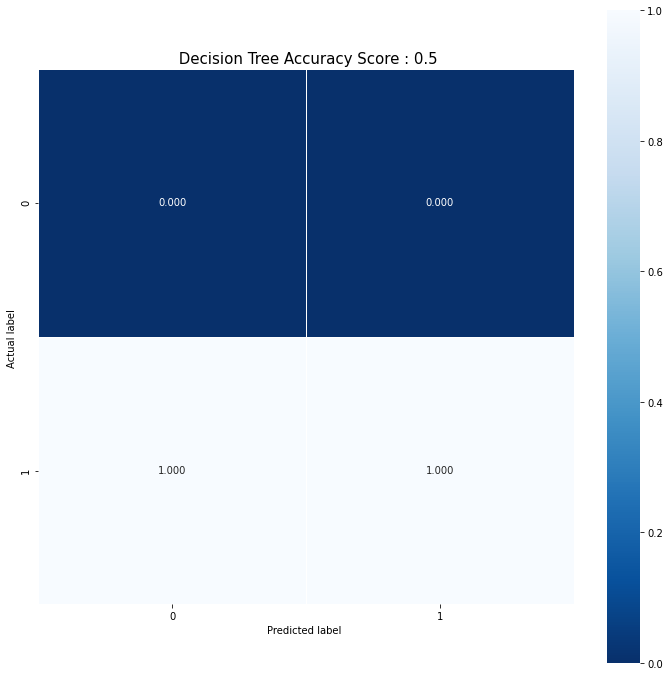

In [62]:
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);


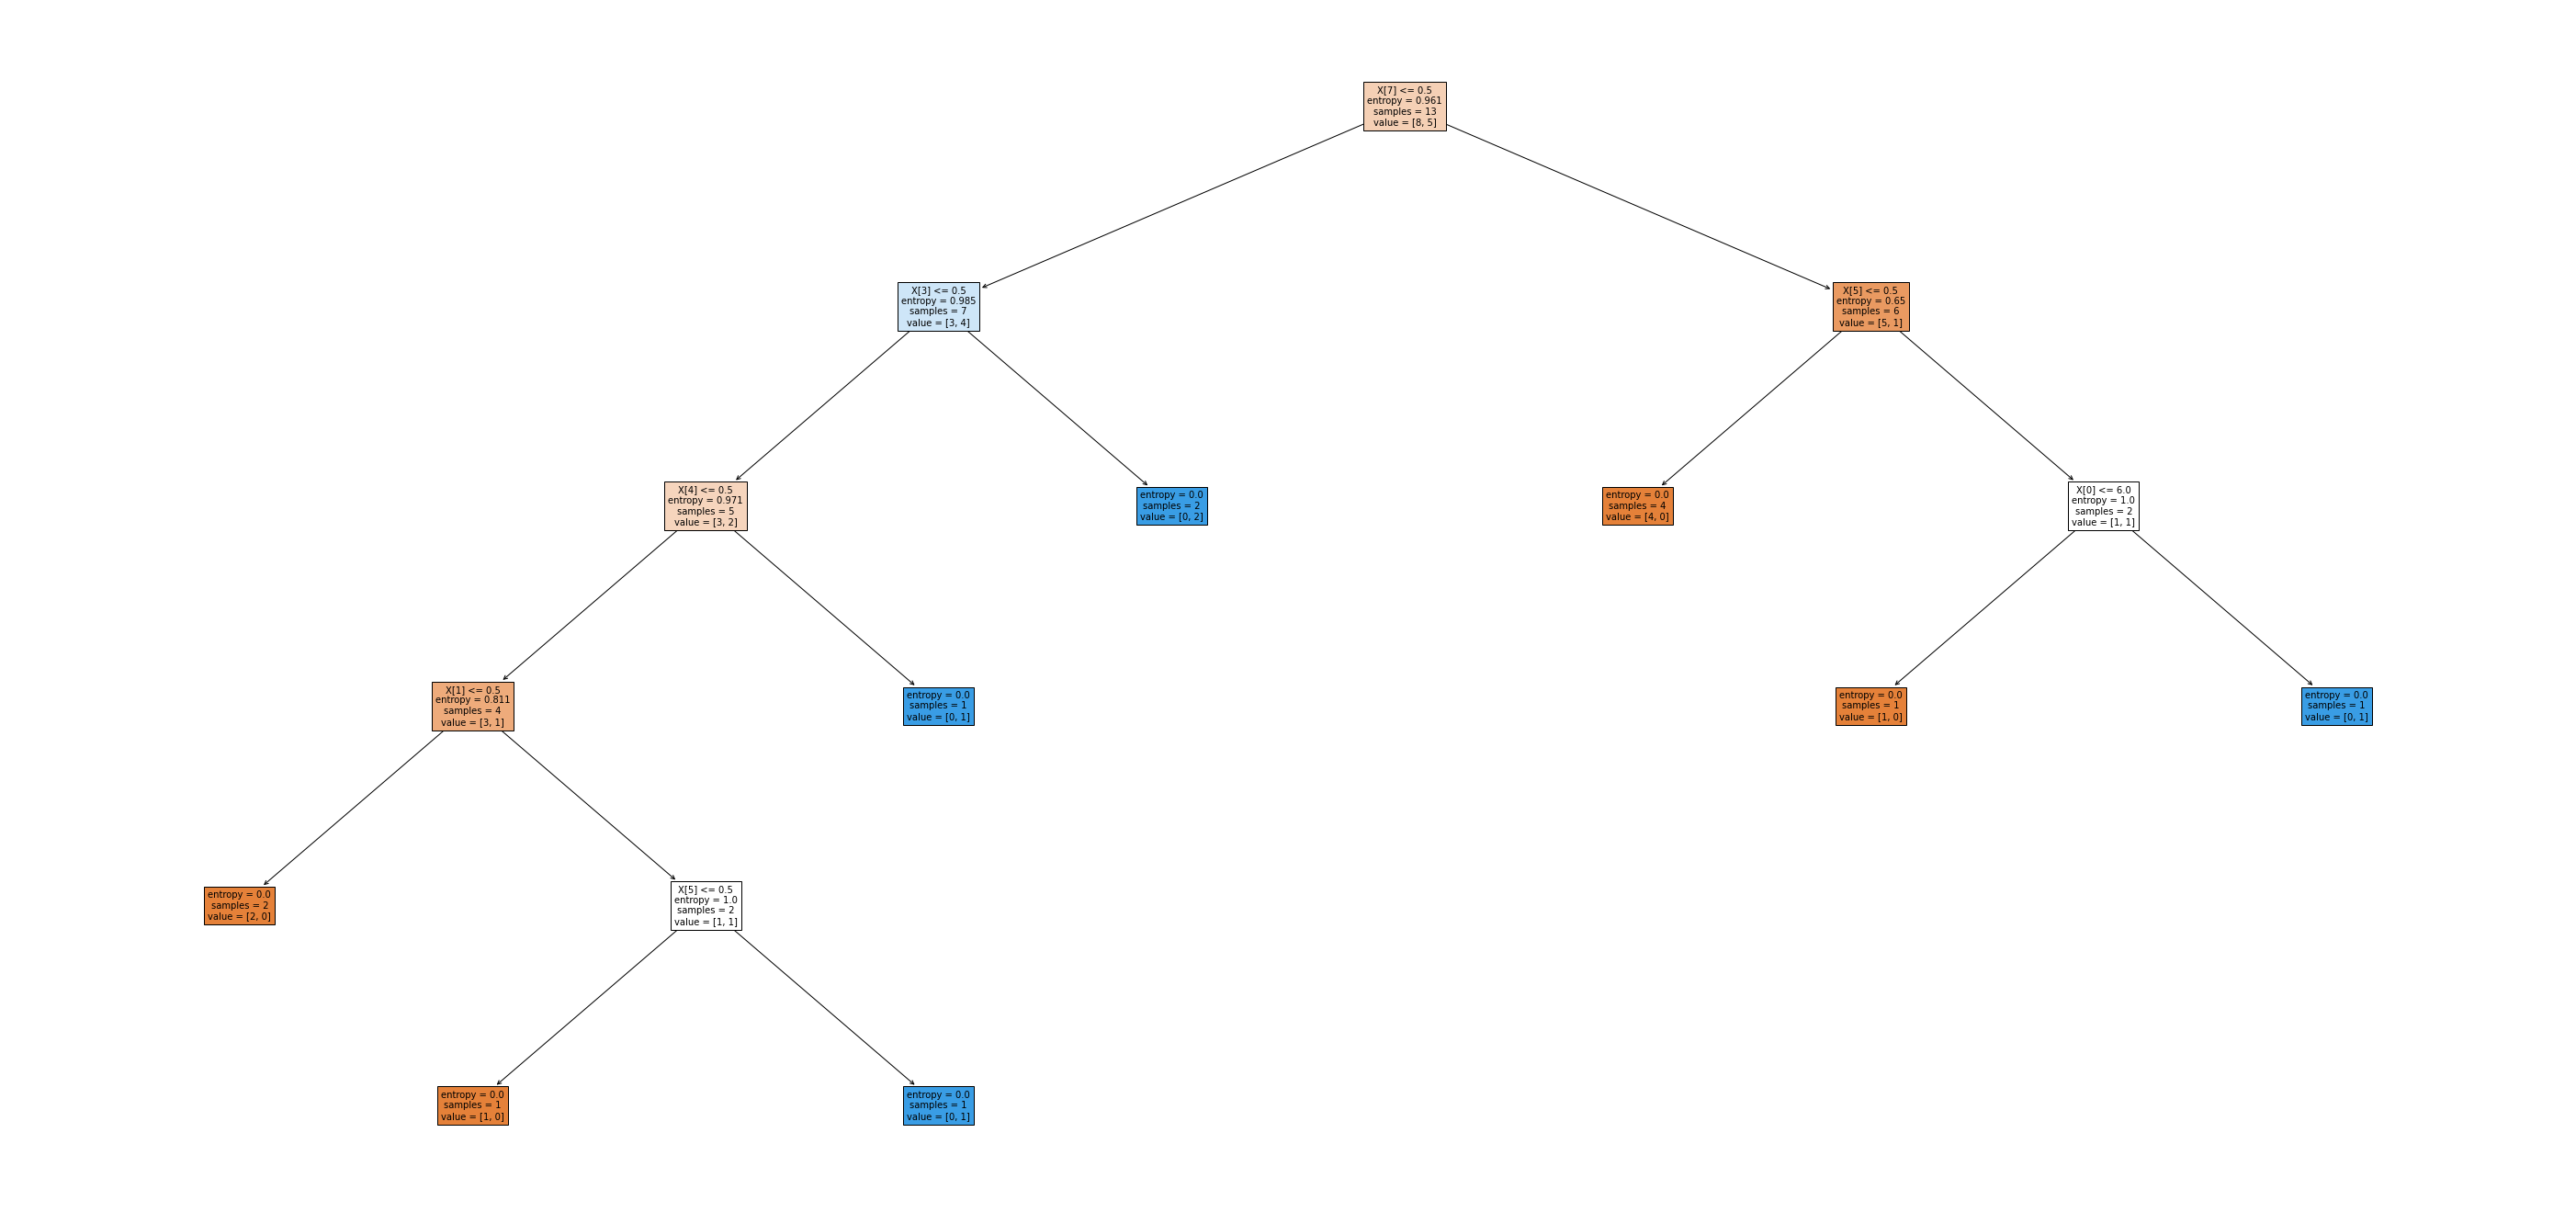

In [63]:
#vẽ cây ID3
fig, ax = plt. subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig(' decision tree', dpi=100)
plt.show()

In [77]:
#Xây dựng cây CART
clf=tree.DecisionTreeClassifier(criterion="gini", random_state=0) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [78]:
#áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test, tree_pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))


Accuracy: 0.5
Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



In [79]:
#ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

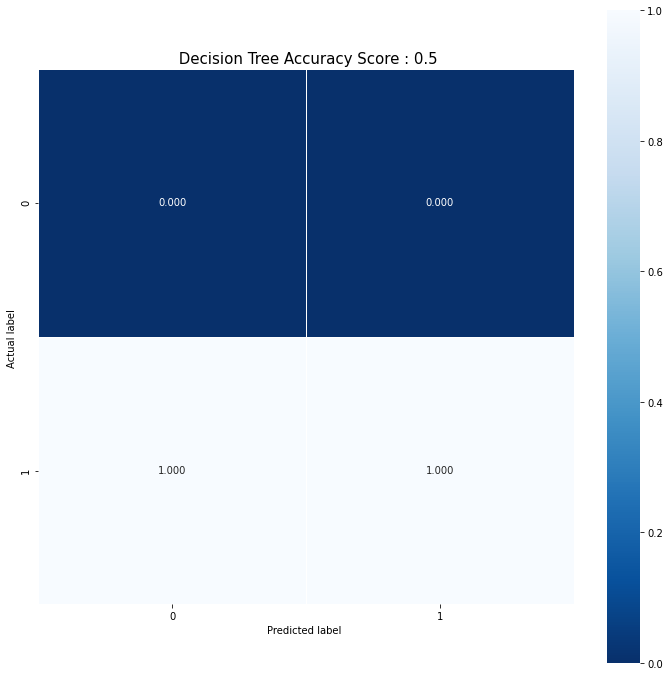

In [80]:
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);

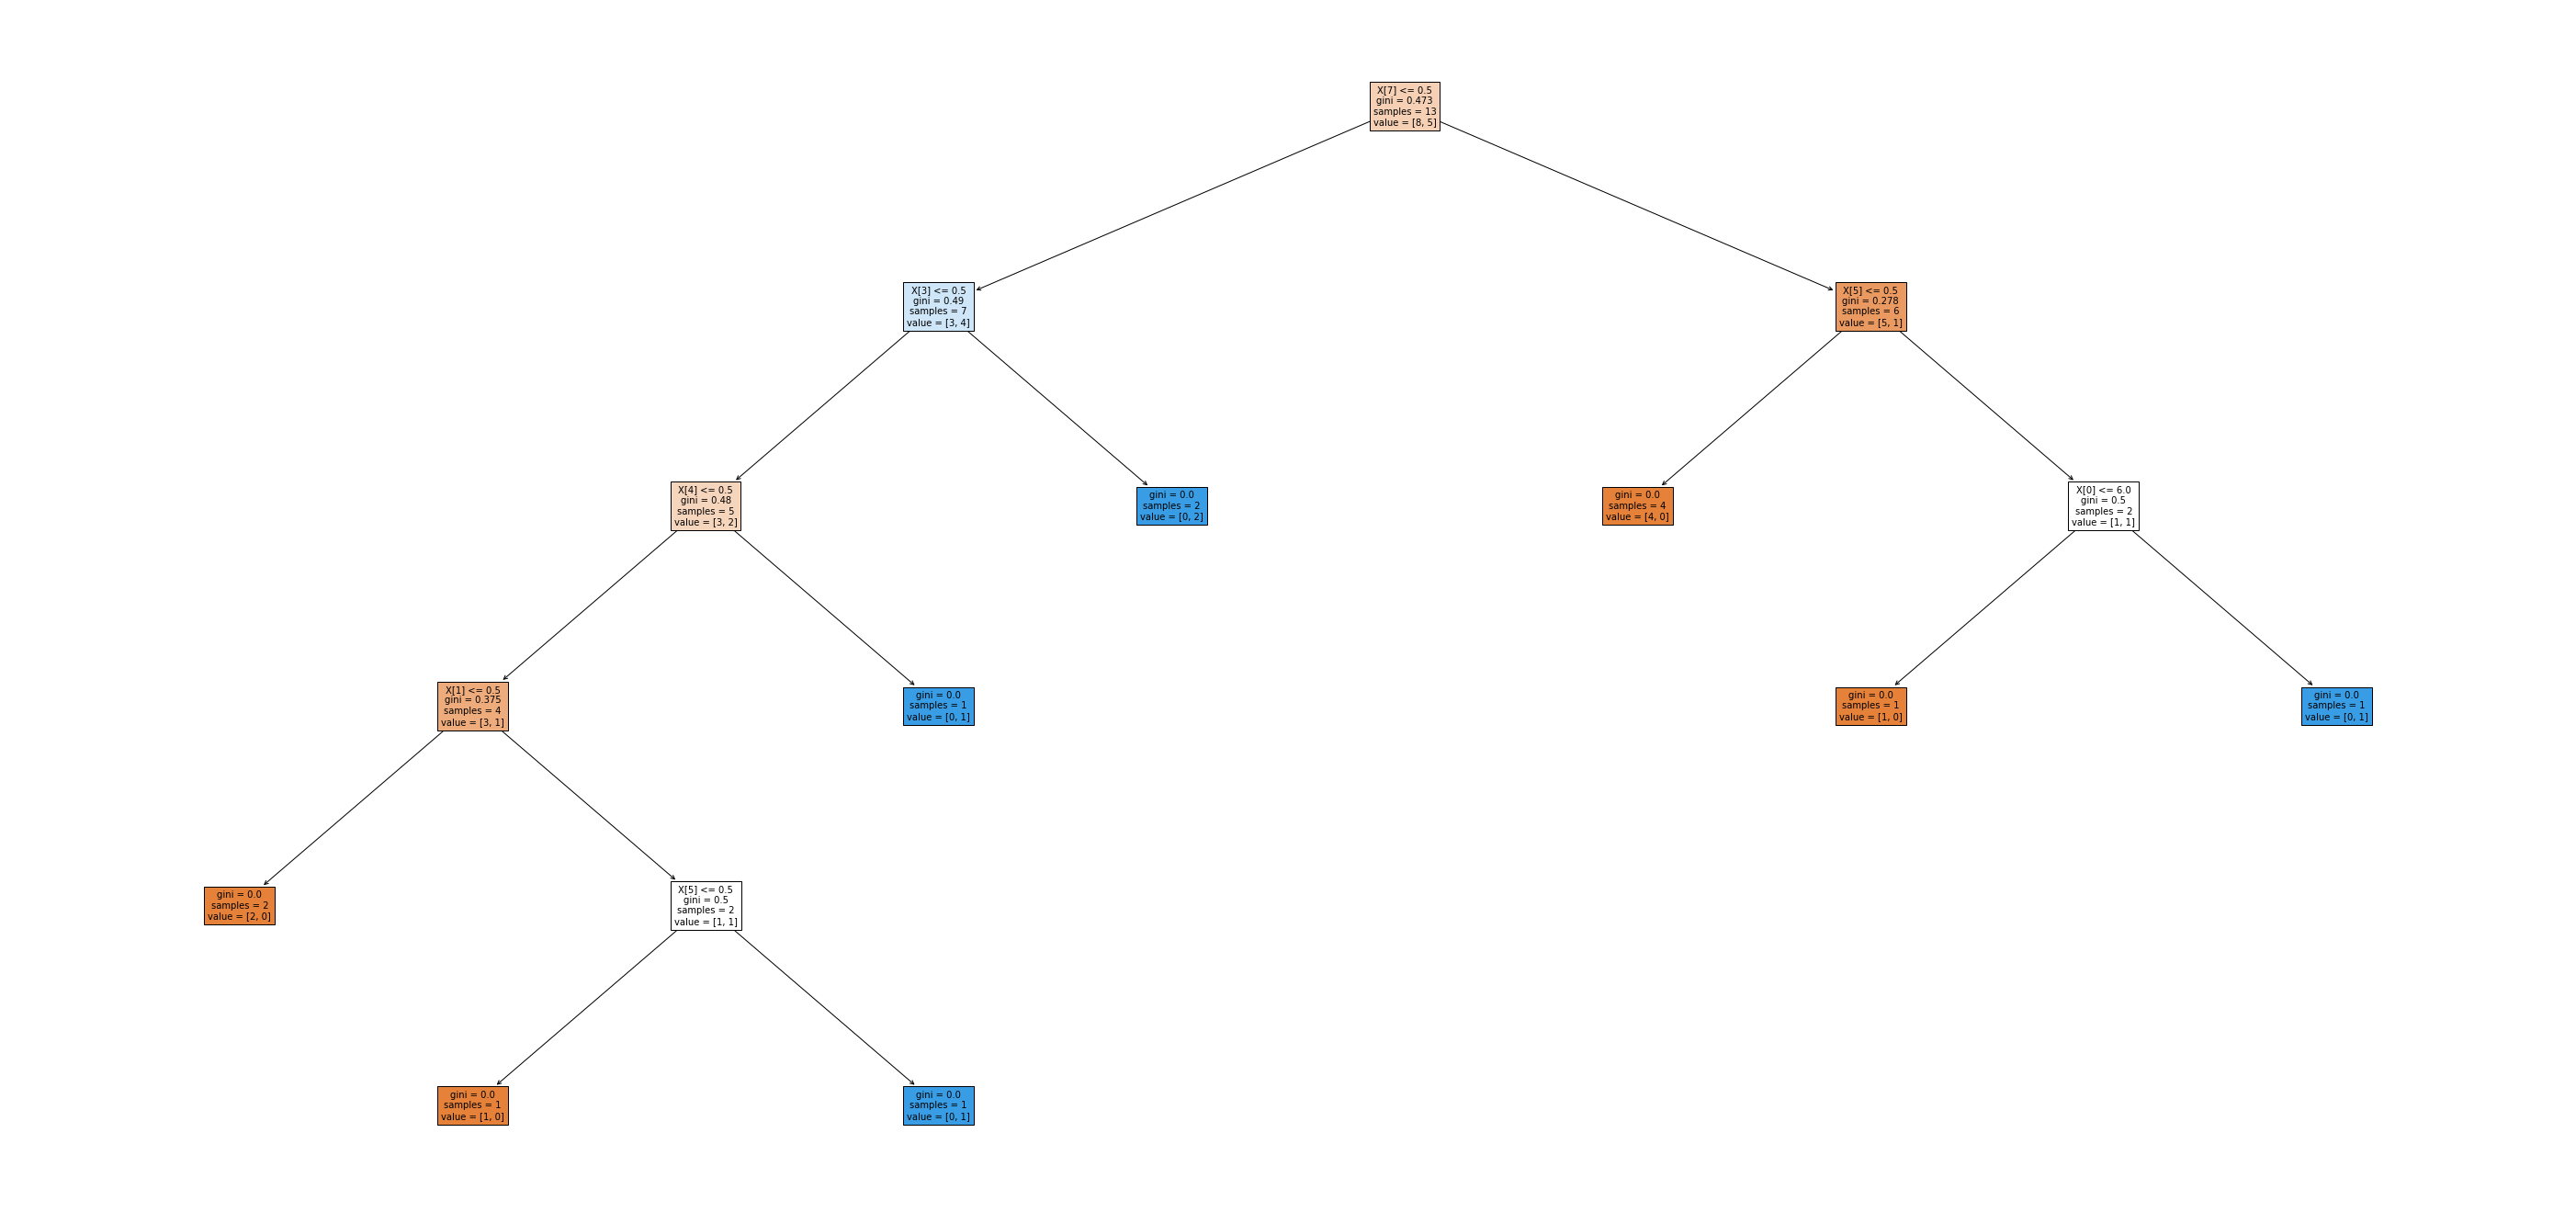

In [81]:
#vẽ cây ID3
fig, ax = plt. subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig(' decision tree', dpi=100)
plt.show()

In [82]:
#Dự đoán 3 mẫu dữ liệu câu d
feat_onehot=pd.get_dummies ( pre_data , columns =pre_data.select_dtypes(exclude=['int64']).columns)
feat_onehot['Kích thước_Nhỏ'] = 0
pred = clf.predict(feat_onehot)
print(pred)

[1 0 1]


Accuracy: 0.6666666666666666
Report:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



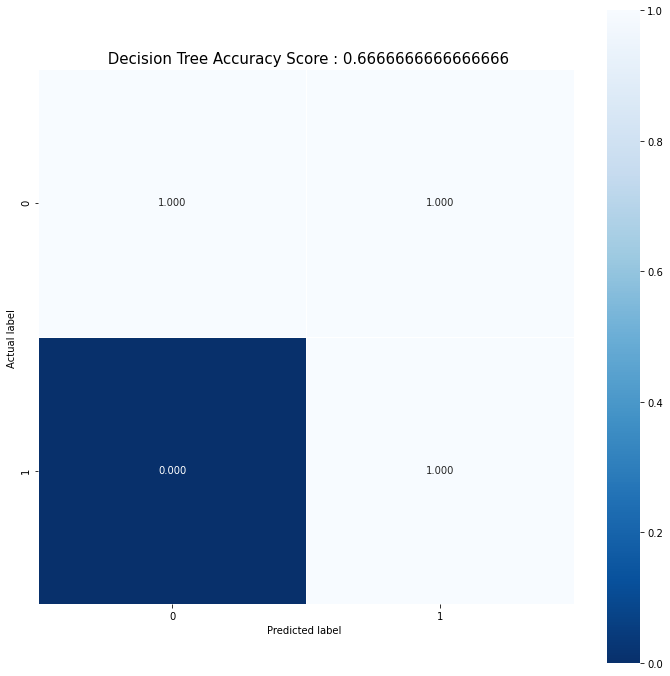

In [86]:
#câu e
#áp dụng mô hình trên dữ liệu kiểm thử.
y_test_pred=[0, 0, 1]
tree_score=metrics.accuracy_score(y_test_pred, pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test_pred,pred))
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
tree_cm = metrics.confusion_matrix(y_test_pred,pred)
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);

In [87]:
#Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)


In [88]:
#Tính toán các giá trị của mô hình
bayes_score = metrics.accuracy_score(y_test, bayes_pred) 
print("Accuracy", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))


Accuracy 0.5
Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



Text(0.5, 1.0, 'Naive Bayes Accuracy: 0.5')

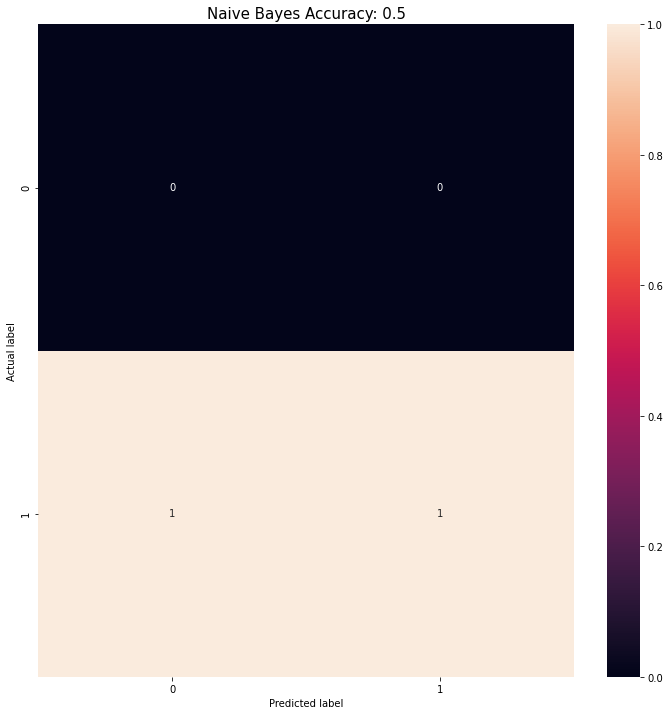

In [89]:
#ma trận nhầm lẫn bằng đồ thị heatmap.
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
fig = plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".0f"); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy: {0}'.format(bayes_score) 
plt.title(title,size=15)
